In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
# TRAIN ON THE ENTIRE REGULAR SEASON 2018-2019.... GET EVERY TEAMS MATCHUPS AND WINNER

df = pd.read_excel("./Data/all_schedules.xlsx")
df = df.loc[df["Year"] == 2016]
df['team'], df['Opponent'] = zip(*df.apply(lambda x: tuple(sorted([x['team'], x['Opponent']])) , axis=1))
df = df[~df[['team', 'Opponent']].duplicated()]

len(df)

6759

In [5]:
df.head()

,G,Date,Time,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri, Nov 13, 2015",7:00p,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,2,"Tue, Nov 17, 2015",8:00p,REG,H,Howard Payne,NaN,NaN,W,70.0,56.0,NaN,2.0,0.0,W 2,Moody Coliseum,Abilene Christian,abilene-christian,14,2016
2,3,"Sun, Nov 22, 2015",10:00p,REG,A,Portland,WCC,-2.21,L,57.0,87.0,NaN,2.0,1.0,L 1,Chiles Center,Abilene Christian,abilene-christian,-30,2016
3,4,"Tue, Nov 24, 2015",9:00p,REG,A,Colorado State,MWC,2.31,L,100.0,108.0,2OT,2.0,2.0,L 2,Moby Arena,Abilene Christian,abilene-christian,-8,2016
4,5,"Fri, Nov 27, 2015",6:00p,REG,N,Florida A&M,MEAC,-21.74,W,72.0,62.0,NaN,3.0,2.0,W 1,American Bank Center,Abilene Christian,abilene-christian,10,2016


In [6]:
test = df
test["Winner"] = np.where(df['W/L'] == 'W', df['team'], df['Opponent'])
test = test.dropna()
test.head()

,G,Date,Time,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year,Winner
3,4,"Tue, Nov 24, 2015",9:00p,REG,A,Colorado State,MWC,2.31,L,100.0,...,2OT,2.0,2.0,L 2,Moby Arena,Abilene Christian,abilene-christian,-8,2016,Colorado State
36,6,"Sat, Nov 28, 2015",2:00p,REG,H,New Mexico State,WAC,3.59,W,66.0,...,OT,4.0,2.0,W 1,Clune Arena,Air Force,air-force,2,2016,Air Force
97,35,"Tue, Mar 15, 2016",7:00p,NIT,A,Ohio State,Big Ten,9.39,L,63.0,...,OT,26.0,9.0,L 2,Value City Arena,Akron,akron,-9,2016,Ohio State
108,11,"Tue, Dec 29, 2015",8:00p,REG,H,Jacksonville State,OVC,-10.26,W,67.0,...,OT,8.0,3.0,W 1,Coleman Coliseum,Alabama,alabama,8,2016,Alabama
118,21,"Tue, Feb 2, 2016",9:00p,REG,A,Mississippi State,SEC,8.18,W,82.0,...,OT,12.0,9.0,W 1,Humphrey Coliseum,Alabama,alabama,2,2016,Alabama


In [7]:
training_set = test.loc[test["Type"] == "REG"]
training_set


,G,Date,Time,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year,Winner
3,4,"Tue, Nov 24, 2015",9:00p,REG,A,Colorado State,MWC,2.31,L,100.0,...,2OT,2.0,2.0,L 2,Moby Arena,Abilene Christian,abilene-christian,-8,2016,Colorado State
36,6,"Sat, Nov 28, 2015",2:00p,REG,H,New Mexico State,WAC,3.59,W,66.0,...,OT,4.0,2.0,W 1,Clune Arena,Air Force,air-force,2,2016,Air Force
108,11,"Tue, Dec 29, 2015",8:00p,REG,H,Jacksonville State,OVC,-10.26,W,67.0,...,OT,8.0,3.0,W 1,Coleman Coliseum,Alabama,alabama,8,2016,Alabama
118,21,"Tue, Feb 2, 2016",9:00p,REG,A,Mississippi State,SEC,8.18,W,82.0,...,OT,12.0,9.0,W 1,Humphrey Coliseum,Alabama,alabama,2,2016,Alabama
131,1,"Fri, Nov 13, 2015",9:00p,REG,A,Tulane,AAC,-0.85,W,68.0,...,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016,Alabama A&M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11149,10,"Sat, Dec 19, 2015",12:00p,REG,A,Wichita St.,Big East,14.66,L,76.0,...,OT,5.0,5.0,L 1,Prudential Center,Seton Hall,wichita-state,-4,2016,Wichita St.
11245,8,"Wed, Dec 2, 2015",7:15p,REG,A,Wisconsin,ACC,14.62,W,66.0,...,OT,5.0,3.0,W 1,Carrier Dome,Syracuse,wisconsin,8,2016,Syracuse
11258,21,"Tue, Jan 26, 2016",7:00p,REG,H,Wisconsin,Big Ten,19.59,W,82.0,...,OT,12.0,9.0,W 3,Kohl Center,Indiana,wisconsin,3,2016,Indiana
11318,14,"Sat, Jan 2, 2016",4:00p,REG,A,Wright St.,Horizon,2.89,W,84.0,...,OT,7.0,7.0,W 4,UW-Milwaukee Panther Arena,Milwaukee,wright-state,2,2016,Milwaukee


In [8]:
small = test[['team', 'Opponent', "Winner", "W/L","Margin", "SRS", 'Site']]
print(len(small))
small.head()
small.reset_index(drop=True, inplace=True)

small.head()

354


,team,Opponent,Winner,W/L,Margin,SRS,Site
0,Abilene Christian,Colorado State,Colorado State,L,-8,2.31,A
1,Air Force,New Mexico State,Air Force,W,2,3.59,H
2,Akron,Ohio State,Ohio State,L,-9,9.39,A
3,Alabama,Jacksonville State,Alabama,W,8,-10.26,H
4,Alabama,Mississippi State,Alabama,W,2,8.18,A


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
converted_season = small
converted_season["team"]=encoder.fit_transform(small["team"])
converted_season["Opponent"]=encoder.fit_transform(small["Opponent"])
#converted_season["Margin"]=encoder.fit_transform(small["Margin"])
#converted_season["SRS"]=encoder.fit_transform(small["SRS"])
converted_season["Site"]=encoder.fit_transform(small["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away
#converted_season["Winner"]=encoder.fit_transform(small["Winner"])


converted_season.head()

C:\Users\Kevin\AppData\Local\Temp/ipykernel_16172/2039266632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_season["team"]=encoder.fit_transform(small["team"])
C:\Users\Kevin\AppData\Local\Temp/ipykernel_16172/2039266632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_season["Opponent"]=encoder.fit_transform(small["Opponent"])
C:\Users\Kevin\AppData\Local\Temp/ipykernel_16172/2039266632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,team,Opponent,Winner,W/L,Margin,SRS,Site
0,0,5,Colorado State,L,-8,2.31,0
1,1,86,Air Force,W,2,3.59,1
2,2,103,Ohio State,L,-9,9.39,0
3,3,34,Alabama,W,8,-10.26,1
4,3,69,Alabama,W,2,8.18,0


In [10]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])
converted_season.head()

C:\Users\Kevin\AppData\Local\Temp/ipykernel_16172/2739196833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])


,team,Opponent,Winner,W/L,Margin,SRS,Site
0,0,5,5,L,-8,2.31,0
1,1,86,1,W,2,3.59,1
2,2,103,103,L,-9,9.39,0
3,3,34,3,W,8,-10.26,1
4,3,69,3,W,2,8.18,0


In [11]:
#converted_season.loc[converted_season["W/L"] == "L"].head()
converted_season = converted_season.drop(columns=["W/L"])
converted_season.head()

,team,Opponent,Winner,Margin,SRS,Site
0,0,5,5,-8,2.31,0
1,1,86,1,2,3.59,1
2,2,103,103,-9,9.39,0
3,3,34,3,8,-10.26,1
4,3,69,3,2,8.18,0


In [12]:
# TRAIN MODEL ON team now....   
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost

converted_season.head()

,team,Opponent,Winner,Margin,SRS,Site,team_game_win
0,0,5,5,-8,2.31,0,1.0
1,1,86,1,2,3.59,1,2.0
2,2,103,103,-9,9.39,0,1.0
3,3,34,3,8,-10.26,1,2.0
4,3,69,3,2,8.18,0,2.0


CORRELATION MATRIX

Note: you may need to restart the kernel to use updated packages.


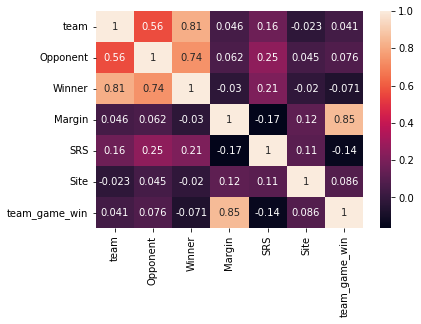

In [13]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

FEATURES ARE NOT THAT CORREALTED EXCEPT FOR MARGIN AND TEAM_GAME_WIN... MAY NEED TO ADD DIFFERENT STATISTICS

In [14]:
X=converted_season.drop(["team_game_win"],axis=1).values
X.ndim
X

array([[  0.  ,   5.  ,   5.  ,  -8.  ,   2.31,   0.  ],
       [  1.  ,  86.  ,   1.  ,   2.  ,   3.59,   1.  ],
       [  2.  , 103.  , 103.  ,  -9.  ,   9.39,   0.  ],
       ...,
       [114.  , 212.  , 114.  ,   3.  ,  19.59,   1.  ],
       [154.  , 214.  , 154.  ,   2.  ,   2.89,   0.  ],
       [ 85.  , 217.  , 217.  ,  -3.  ,  -0.79,   0.  ]])

In [15]:
Y=converted_season["team_game_win"].values
Y=Y.reshape(-1,1)
Y.ndim

2

TRAINING DATA NEEDS TO BE CHANGED TO ONLY COVER THE REGULAR SEASON AND TEST DATA SHOULD BE NCAA TOURNAMENT

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(len(x_train))
y_train

283


array([[2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

SVM CODE

In [18]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_clf.fit(x_train,y_train)

c:\Users\Kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto')

In [19]:
y_pred=svm_clf.predict(x_test)
print("Acurracy of our model is :")
accuracy_score(y_test,y_pred)

Acurracy of our model is :


0.9859154929577465